# Oscana: Event Images

**Aims**:

- Plot a MINOS event display using the tools provided in "image.py".

**Contents**:

- [Imports & Settings](#imports--settings).
- [Loading the Data](#loading-the-data).
- [Creating Event Images](#creating-event-images).
- [Plotting FD 2D Event Images](#plotting-fd-2d-event-images).

## Imports & Settings

### Imports

In [1]:
import sys

import numpy as np
import matplotlib as mpl

import oscana


+----------------------------------------------------------+
| Oscana (v0.5.1) - Neutrino Oscillation Analysis Package. |
+----------------------------------------------------------+



In [2]:
oscana.init()

### Versions

In [3]:
print("Module Versions\n---------------")
print("Python Version:", sys.version.split()[0], "\n")
print("NumPy Version:", np.__version__)
print("Matplotlib Version:", mpl.__version__, "\n")

print("Oscana Version:", oscana.get_version())

Module Versions
---------------
Python Version: 3.11.11 

NumPy Version: 2.2.4
Matplotlib Version: 3.10.1 

Oscana Version: 0.5.1


## Loading the Data

In [4]:
dh = oscana.data.DataHandler(variables=oscana.IMAGE_ALL_VARIABLES)

In [5]:
dh.print_handler_info()

Data IO
-------
	- IO Strategy Class : Oscana.PandasIO(parent=DataHandler)
	- SNTP Loader       : Naïve Loader V1
	- uDST Loader       : ???
	- HDF5 Loader       : ???
	- HDF5 Writer       : ???

Settings
--------
	- Cuts Table : Disabled


In [6]:
dh.io.from_sntp(files=["SNTP_F21042000_0000_D5_D07_R7"])

In [7]:
dh.print_metadata()

Cuts
----
	[ No Cuts Applied ]

Transforms
----------
	[ No Transforms Applied ]

f21042000_0000_L250200R_D07_r7.sntp.dogwood5.0.root
---------------------------------------------------
File Format     : Root
File Type       : Monte Carlo
Experiment      : Minos
Detector        : Far
Int. Region     : Detector
Flavour         : Unoscillated
Mag. Field      : New Reversed
Horn Position   : Low Energy
Target Z Shift  : 250 cm
Curr. Direction : Reverse
Current         : 200 kAmps
Run Number      : 7
MC Version      : Daikon 7
Reco. Version   : Dogwood 5.0
Date and Time
    Start       : 2010-09-17 09:00:13
    End         : 2010-09-17 12:02:27
Total Entries   : 89,395
First Loaded On : 2025-05-07 00:30:48




## Creating Event Images

In [8]:
event = dh.data.iloc[7]

print(event)

stp.planeview     [3, 3, 2, 2, 2, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, ...
stp.strip         [149, 160, 107, 118, 128, 152, 112, 145, 146, ...
stp.plane         [470, 470, 473, 473, 473, 474, 475, 476, 476, ...
stp.ph0.pe        [0.0, 0.0, 1.3110186, 42.522102, 0.0, 0.0, 0.6...
stp.ph1.pe        [0.34895083, 1.3013823, 0.0, 26.028223, 0.2530...
stp.ph0.sigcor    [0.0, 0.0, 121.47313, 3663.4504, 0.0, 0.0, 70....
stp.ph1.sigcor    [46.97928, 184.89342, 0.0, 1443.7072, 13.76580...
stp.time0         [-999999.0, -999999.0, 1.9531105702391467e-05,...
stp.time1         [1.956580202432369e-05, 1.9568918166928843e-05...
Name: 7, dtype: object


In [9]:
image = oscana.create_fd_full_image(
    plane=oscana.EPlaneView.U,
    stp_planeview=event["stp.planeview"],
    stp_strip=event["stp.strip"],
    stp_plane=event["stp.plane"],
)

print(image.shape)

(192, 485, 1)


In [10]:
image = oscana.create_fd_full_image(
    plane=oscana.EPlaneView.U,
    stp_planeview=event["stp.planeview"],
    stp_strip=event["stp.strip"],
    stp_plane=event["stp.plane"],
    fill=[event["stp.ph0.pe"], event["stp.ph1.pe"]],
)

print(image.shape)

(192, 485, 2)


## Plotting FD 2D Event Images

Select an event to plot.

In [11]:
event = dh.data.iloc[1]

print(event)

stp.planeview     [2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, ...
stp.strip         [18, 11, 32, 158, 23, 29, 31, 42, 149, 154, 19...
stp.plane         [263, 267, 267, 268, 269, 269, 269, 269, 270, ...
stp.ph0.pe        [3.9493148, 2.2312045, 1.0632721, 1.3482299, 0...
stp.ph1.pe        [0.0, 0.0, 0.0, 0.0, 0.0, 0.4872089, 9.323529,...
stp.ph0.sigcor    [254.15413, 165.5135, 73.636604, 129.51033, 70...
stp.ph1.sigcor    [0.0, 0.0, 0.0, 0.0, 0.0, 48.174328, 956.8084,...
stp.time0         [1.940725526236665e-05, 1.9326145068806578e-05...
stp.time1         [-999999.0, -999999.0, -999999.0, -999999.0, -...
Name: 1, dtype: object


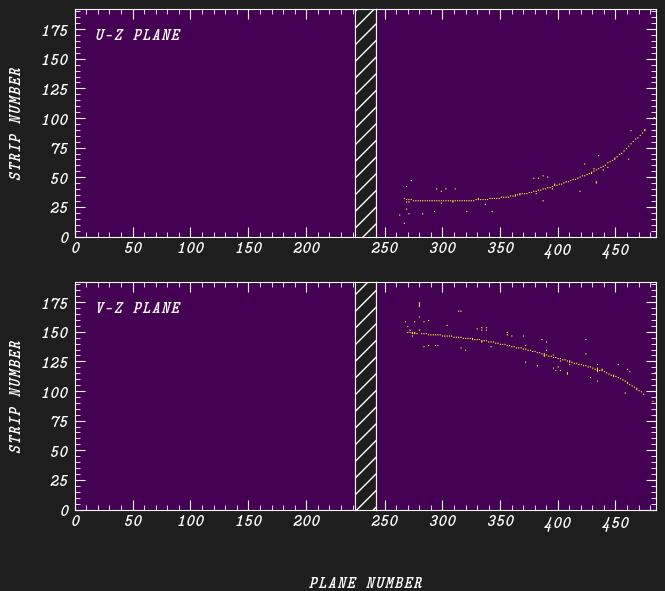

In [12]:
with oscana.plotting_context(theme_name="slate"):
    oscana.plot_fd_event_image(
        stp_planeview=event["stp.planeview"],
        stp_strip=event["stp.strip"],
        stp_plane=event["stp.plane"],
    )

Plot the measured photoelectrons on the western strip end.

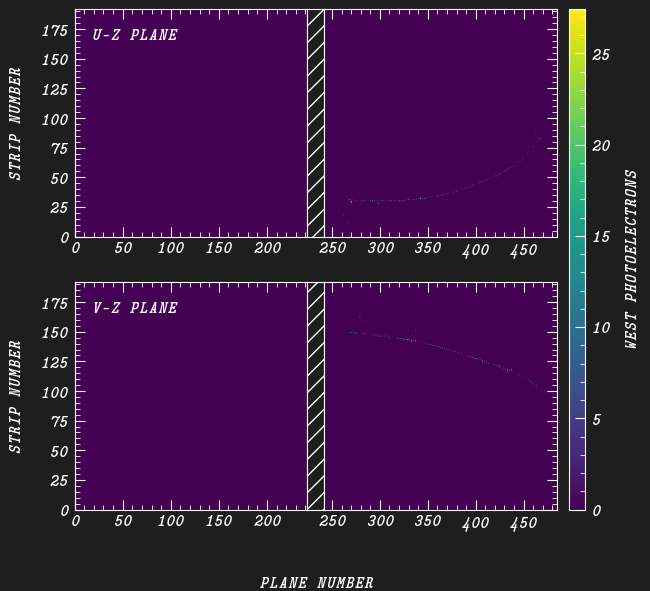

In [13]:
with oscana.plotting_context(theme_name="slate"):
    oscana.plot_fd_event_image(
        stp_planeview=event["stp.planeview"],
        stp_strip=event["stp.strip"],
        stp_plane=event["stp.plane"],
        fill=event["stp.ph0.pe"],
        cbar_label="West Photoelectrons",
    )